# Imports

In [29]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import plot_roc_curve


# Exploring the data

In [30]:
df = pd.read_csv("./data/train.csv")
df_test = pd.read_csv("./data/test.csv")

In [31]:
df.head(10)

,molecule,conformation,F1,F2,F3,F4,F5,F6,F7,F8,...,F158,F159,F160,F161,F162,F163,F164,F165,F166,class
0,188,188_1+1,42,-198,-109,-75,-117,11,23,-88,...,-74,-129,-120,-38,30,48,-37,6,30,1.0
1,188,188_1+2,42,-191,-142,-65,-117,55,49,-170,...,-302,60,-120,-39,31,48,-37,5,30,1.0
2,188,188_1+3,42,-191,-142,-75,-117,11,49,-161,...,-73,-127,-120,-38,30,48,-37,5,31,1.0
3,188,188_1+4,42,-198,-110,-65,-117,55,23,-95,...,-302,60,-120,-39,30,48,-37,6,30,1.0
4,190,190_1+1,42,-198,-102,-75,-117,10,24,-87,...,-73,-127,51,128,144,43,-30,14,26,1.0
5,190,190_1+2,42,-191,-142,-65,-117,55,49,-170,...,-300,61,51,127,143,42,-31,14,26,1.0
6,190,190_1+3,42,-190,-142,-75,-117,12,49,-161,...,-72,-125,51,124,143,44,-30,14,29,1.0
7,190,190_1+4,42,-199,-102,-65,-117,55,23,-94,...,-300,61,51,127,144,42,-30,14,25,1.0
8,211,211_1+1,40,-173,-142,13,-116,-7,50,-171,...,-53,20,38,88,133,66,-28,13,58,1.0
9,211,211_1+2,44,-159,-63,-74,-117,17,5,-114,...,-62,-111,-12,153,134,45,-37,-9,-25,1.0


In [32]:
df_test.head(10)

,molecule,conformation,F1,F2,F3,F4,F5,F6,F7,F8,...,F157,F158,F159,F160,F161,F162,F163,F164,F165,F166
0,j90,j90_1+1,130,-195,-147,-110,230,-183,46,-13,...,-234,-222,-208,30,253,291,35,-34,2,-9
1,j90,j90_1+2,43,-199,-164,-76,238,84,-163,51,...,-237,-230,54,185,187,182,51,-36,-16,-32
2,j90,j90_1+3,59,91,-102,-112,-117,-183,44,12,...,-237,-252,-210,185,193,184,91,-14,13,89
3,j90,j90_1+4,61,89,-166,-75,-117,78,-161,62,...,-246,-265,46,185,195,183,94,-13,13,93
4,f159,f159_1+1,55,-138,-59,-74,-117,10,37,-72,...,-237,-72,-125,17,109,45,60,-43,-19,38
5,f159,f159_1+2,57,-81,-75,-64,-117,53,65,-129,...,-235,-298,61,21,88,45,60,-45,-22,34
6,jp10,jp10_1+1,47,-199,-166,145,-117,47,-157,-213,...,-240,-321,5,-30,149,118,68,-46,-41,-30
7,jp10,jp10_1+2,34,-196,-165,127,-117,79,-158,-217,...,-233,-316,-183,-66,-35,96,107,-22,-10,104
8,jp10,jp10_1+3,33,-199,-165,119,-116,82,-160,-218,...,-234,-315,-188,-134,7,30,164,-34,-156,-38
9,j147,j147_1+1,42,-14,16,-38,-117,40,-164,58,...,-234,-66,31,-15,128,103,69,-38,-34,-46


In [33]:
df.shape

(325, 169)

In [34]:
df.isna().sum()

molecule        0
conformation    0
F1              0
F2              0
F3              0
               ..
F163            0
F164            0
F165            0
F166            0
class           0
Length: 169, dtype: int64

In [35]:
df.dropna()
df.shape

(325, 169)

In [36]:
df.describe()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F158,F159,F160,F161,F162,F163,F164,F165,F166,class
count,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,...,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000
mean,39.344615,-121.544615,-79.892308,14.652308,-113.298462,-11.870769,-18.513846,6.981538,-94.596923,-77.904615,...,-206.381538,-109.501538,-26.295385,37.763077,80.221538,86.086154,-35.046154,-28.378462,33.750769,0.440000
std,18.444729,89.974904,69.206286,75.694107,21.206077,90.073608,105.141222,78.094670,93.278327,66.478810,...,86.651329,122.359888,67.076280,87.855218,48.221904,52.167926,17.311445,62.498851,52.510046,0.497152
min,-9.000000,-199.000000,-166.000000,-115.000000,-117.000000,-184.000000,-169.000000,-231.000000,-242.000000,-283.000000,...,-324.000000,-217.000000,-135.000000,-126.000000,-78.000000,39.000000,-132.000000,-258.000000,-72.000000,0.000000
25%,32.000000,-193.000000,-145.000000,-54.000000,-117.000000,-92.000000,-159.000000,-10.000000,-215.000000,-120.000000,...,-263.000000,-208.000000,-115.000000,-42.000000,39.000000,53.000000,-42.000000,-28.000000,-10.000000,0.000000
50%,42.000000,-159.000000,-109.000000,28.000000,-117.000000,11.000000,40.000000,21.000000,-43.000000,-75.000000,...,-238.000000,-191.000000,-15.000000,35.000000,81.000000,68.000000,-36.000000,-13.000000,35.000000,0.000000
75%,51.000000,-101.000000,-21.000000,34.000000,-117.000000,65.000000,50.000000,57.000000,-32.000000,-29.000000,...,-156.000000,30.000000,24.000000,131.000000,119.000000,98.000000,-28.000000,7.000000,72.000000,1.000000
max,121.000000,98.000000,83.000000,157.000000,214.000000,191.000000,212.000000,188.000000,127.000000,98.000000,...,68.000000,173.000000,115.000000,211.000000,197.000000,302.000000,24.000000,82.000000,235.000000,1.000000


# Logistic Regression

In [37]:
y =df["class"]
x = df.drop(["molecule", "conformation", "class"], axis = 1)
x = x.abs()
X = np.array(x).astype(float)
Y = np.array(y).astype(float)
x.head(10)

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F157,F158,F159,F160,F161,F162,F163,F164,F165,F166
0,42,198,109,75,117,11,23,88,28,27,...,238,74,129,120,38,30,48,37,6,30
1,42,191,142,65,117,55,49,170,45,5,...,238,302,60,120,39,31,48,37,5,30
2,42,191,142,75,117,11,49,161,45,28,...,238,73,127,120,38,30,48,37,5,31
3,42,198,110,65,117,55,23,95,28,5,...,238,302,60,120,39,30,48,37,6,30
4,42,198,102,75,117,10,24,87,28,28,...,238,73,127,51,128,144,43,30,14,26
5,42,191,142,65,117,55,49,170,45,6,...,238,300,61,51,127,143,42,31,14,26
6,42,190,142,75,117,12,49,161,45,29,...,238,72,125,51,124,143,44,30,14,29
7,42,199,102,65,117,55,23,94,29,6,...,238,300,61,51,127,144,42,30,14,25
8,40,173,142,13,116,7,50,171,44,103,...,236,53,20,38,88,133,66,28,13,58
9,44,159,63,74,117,17,5,114,31,33,...,235,62,111,12,153,134,45,37,9,25


In [38]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.7, random_state=42)

In [39]:
LR = LogisticRegression(max_iter= 1000)
LR.fit(x_train,y_train)
LR_predict = LR.predict(x_test)

In [40]:
LR_clr = cross_val_score(LR, x_train,y_train, cv=5, scoring="f1_macro", )
print("Logistic regression accuracy:", metrics.accuracy_score(y_test, LR_predict))

Logistic regression accuracy: 0.7894736842105263


# Plot

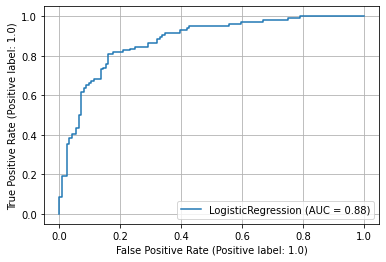

In [41]:
LR_disp = plot_roc_curve(LR, x_test, y_test)
plt.grid()
plt.savefig("logistic_AUC.png")
plt.show()

# Logistic Regression with PCA

In [42]:
def pca_apply(df,n_components=68):
    pca = PCA(n_components=n_components)
    reduced_vectors = pca.fit_transform(df)
    return pd.DataFrame(reduced_vectors)

In [43]:
SC = StandardScaler()
sc_x_train = SC.fit_transform(x_train)
sc_x_test = SC.transform(x_test)

pca = PCA(n_components=65)
sc_x_train = pca.fit_transform(sc_x_train)
sc_x_test = pca.transform(sc_x_test)

explained_variance = pca.explained_variance_ratio_



In [44]:
LR_PCA = LogisticRegression(max_iter=10000)
LR_PCA.fit(sc_x_train, y_train)

LR_PCA_pred = LR_PCA.predict(sc_x_test)
kf = KFold(n_splits=50)
LR_clf = cross_val_score(LR_PCA, sc_x_train,y_train, cv=kf, scoring="f1_macro", )

print("Accuracy: ", metrics.accuracy_score(y_test, LR_PCA_pred))
print("%0.2f accuracy with a standard deviation of %0.2f" % (LR_clf.mean(), LR_clf.std()))


Accuracy:  0.7719298245614035
0.70 accuracy with a standard deviation of 0.36


# Confusion matrix of Logistic regression

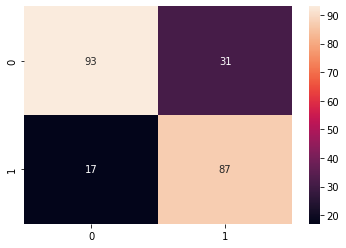

In [45]:
LR_cnf_matrix = metrics.confusion_matrix(y_test, LR_predict)
LR_ax = sns.heatmap(LR_cnf_matrix, annot=True)


In [46]:
df.head()

,molecule,conformation,F1,F2,F3,F4,F5,F6,F7,F8,...,F158,F159,F160,F161,F162,F163,F164,F165,F166,class
0,188,188_1+1,42,-198,-109,-75,-117,11,23,-88,...,-74,-129,-120,-38,30,48,-37,6,30,1.0
1,188,188_1+2,42,-191,-142,-65,-117,55,49,-170,...,-302,60,-120,-39,31,48,-37,5,30,1.0
2,188,188_1+3,42,-191,-142,-75,-117,11,49,-161,...,-73,-127,-120,-38,30,48,-37,5,31,1.0
3,188,188_1+4,42,-198,-110,-65,-117,55,23,-95,...,-302,60,-120,-39,30,48,-37,6,30,1.0
4,190,190_1+1,42,-198,-102,-75,-117,10,24,-87,...,-73,-127,51,128,144,43,-30,14,26,1.0


# Logistic Regression, with highly correlated dropped

In [47]:
corr_matrix = df.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
df = df.drop(columns = to_drop)

In [48]:
y =df["class"]
x = df.drop(["molecule", "conformation", "class"], axis = 1)
x = x.abs()
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.8, random_state=42)
x.head()


,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F157,F158,F159,F160,F161,F162,F163,F164,F165,F166
0,42,198,109,75,117,11,23,88,28,27,...,238,74,129,120,38,30,48,37,6,30
1,42,191,142,65,117,55,49,170,45,5,...,238,302,60,120,39,31,48,37,5,30
2,42,191,142,75,117,11,49,161,45,28,...,238,73,127,120,38,30,48,37,5,31
3,42,198,110,65,117,55,23,95,28,5,...,238,302,60,120,39,30,48,37,6,30
4,42,198,102,75,117,10,24,87,28,28,...,238,73,127,51,128,144,43,30,14,26


In [49]:
LR = LogisticRegression(max_iter= 10000, C=0.01, penalty='l2', solver="lbfgs")
LR.fit(x_train,y_train)
LR_predict = LR.predict(x_test)

In [50]:
LR_clr = cross_val_score(LR, x_train,y_train, cv=5, scoring="f1_macro", )
print("Logistic regression accuracy:", metrics.accuracy_score(y_test, LR_predict))
print("%0.2f accuracy with a standard deviation of %0.2f" % (LR_clr.mean(), LR_clr.std()))


Logistic regression accuracy: 0.7615384615384615
0.78 accuracy with a standard deviation of 0.05


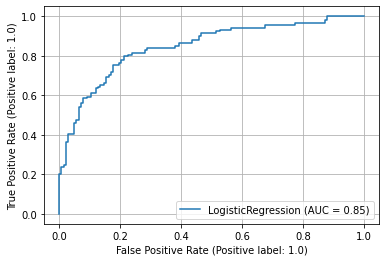

In [51]:
LR_disp = plot_roc_curve(LR, x_test, y_test)
plt.grid()
plt.savefig("logistic_dropped_auc.png")
plt.show()

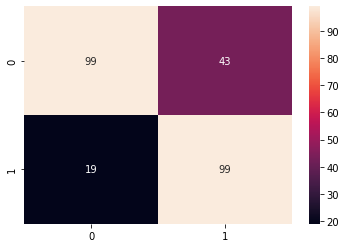

In [52]:
LR_cnf_matrix = metrics.confusion_matrix(y_test, LR_predict)
LR_ax = sns.heatmap(LR_cnf_matrix, annot=True)

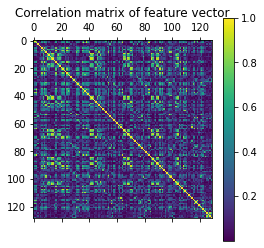

In [53]:
fig = plt
fig.matshow(x.corr().abs())
fig.title("Correlation matrix of feature vector")
fig.colorbar()
fig.savefig("corr_drop.png", format="png")
fig.show()

# Grid search parameter optimizations

In [54]:
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
grid = dict(solver=solvers, penalty = penalty, C =c_values)
model = LogisticRegression(max_iter=1000, random_state=42)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_train,y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.715873 using {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
0.688889 (0.212509) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.688889 (0.212509) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.694444 (0.205194) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.688889 (0.212509) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.688889 (0.212509) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.694444 (0.205194) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.688889 (0.212509) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.688889 (0.212509) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.694444 (0.205194) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.696032 (0.198128) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.699206 (0.217131) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.704762 (0.209704) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.705556 (0.198776) with: 